In [7]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [8]:
mu = -.1+.05j     # center of airfoil on complex plane
alpha = 0         # angle of attack [rad]
Vinfty = 1

In [9]:
# define x and y symbols for later
x, y = sym.symbols("x y", real=True)
z = sym.Symbol("z", imaginary=True)

# pre-mapped airfoil properties
R = np.abs(1 - mu)
Gamma = 4 * np.pi * Vinfty * R * np.sin(alpha + np.arcsin(np.imag(mu) / R))

# IMPORTANT: REMOVE
Gamma =3
alpha = 0
Vinfty = .4

# velocity field
Wconjugate_z = (
    Vinfty * sym.exp(-1j * alpha)
    + 1j * Gamma / (2 * sym.pi * (z - mu))
    - Vinfty * R**2 * sym.exp(1j * alpha) / (z - mu) ** 2
)
# Wconjugate_z = Wconjugate_z.subs({"V": Vinfty, "R": R, "alpha": alpha, "mu": mu, "Gamma": Gamma})
velField_z = Wconjugate_z.subs(z, x + 1j * y).conjugate()
velField = (Wconjugate_z / (1 - 1 / z**2)).subs(z, x + 1j * y).conjugate()

In [10]:
# make the Joukowsky Map and make it a numpy lambda
jMap = sym.sympify("(x+I*y)+1/(x+I*y)")
jMapNumpy = sym.lambdify((x, y), jMap, "numpy")

# Then make u and v

u, v = velField.as_real_imag()
uNumpy = sym.lambdify((x, y), u, "numpy")
vNumpy = sym.lambdify((x, y), v, "numpy")

u_z, v_z = velField_z.as_real_imag()
uNumpy_z = sym.lambdify((x, y), u_z, "numpy")
vNumpy_z = sym.lambdify((x, y), v_z, "numpy")

# Mapping

In [11]:
# Airfoil itself
theta = np.linspace(0, 2 * np.pi, int(1e4))
AFr_z = np.abs(1 - mu)  # radius of airfoil on z plane
AFpts_z = AFr_z * (np.cos(theta) + 1j * np.sin(theta)) + mu
# points of airfoil on z plane
AFpts = jMapNumpy(np.real(AFpts_z), np.imag(AFpts_z))
# points of airfoil on Cartesian plane

# points
n = 25
xmin_z = np.real(mu) - 2*R
xmax_z = np.real(mu) + 3*R
ymin_z = np.imag(mu) - 1.5*R
ymax_z = np.imag(mu) + 1.7*R
X_z, Y_z = np.meshgrid(np.linspace(xmin_z, xmax_z, n), np.linspace(ymin_z, ymax_z, int(np.floor(1.5*n))))
X_z = X_z.flatten()
Y_z = Y_z.flatten()
X_zfilt = X_z[np.abs(X_z + 1j * Y_z - mu) > AFr_z]
Y_zfilt = Y_z[np.abs(X_z + 1j * Y_z - mu) > AFr_z]
uPts_z = uNumpy_z(X_zfilt, Y_zfilt)
vPts_z = vNumpy_z(X_zfilt, Y_zfilt)

jMapXY = jMapNumpy(X_z, Y_z)
# jMapXY = jMapNumpy(X_z, Y_z)
X, Y = (np.real(jMapXY), np.imag(jMapXY))
X_filt = X[np.abs(X_z + 1j * Y_z - mu) > AFr_z]
Y_filt = Y[np.abs(X_z + 1j * Y_z - mu) > AFr_z]
uPts = uNumpy(X_filt, Y_filt)
vPts = vNumpy(X_filt, Y_filt)

<Figure size 640x480 with 0 Axes>

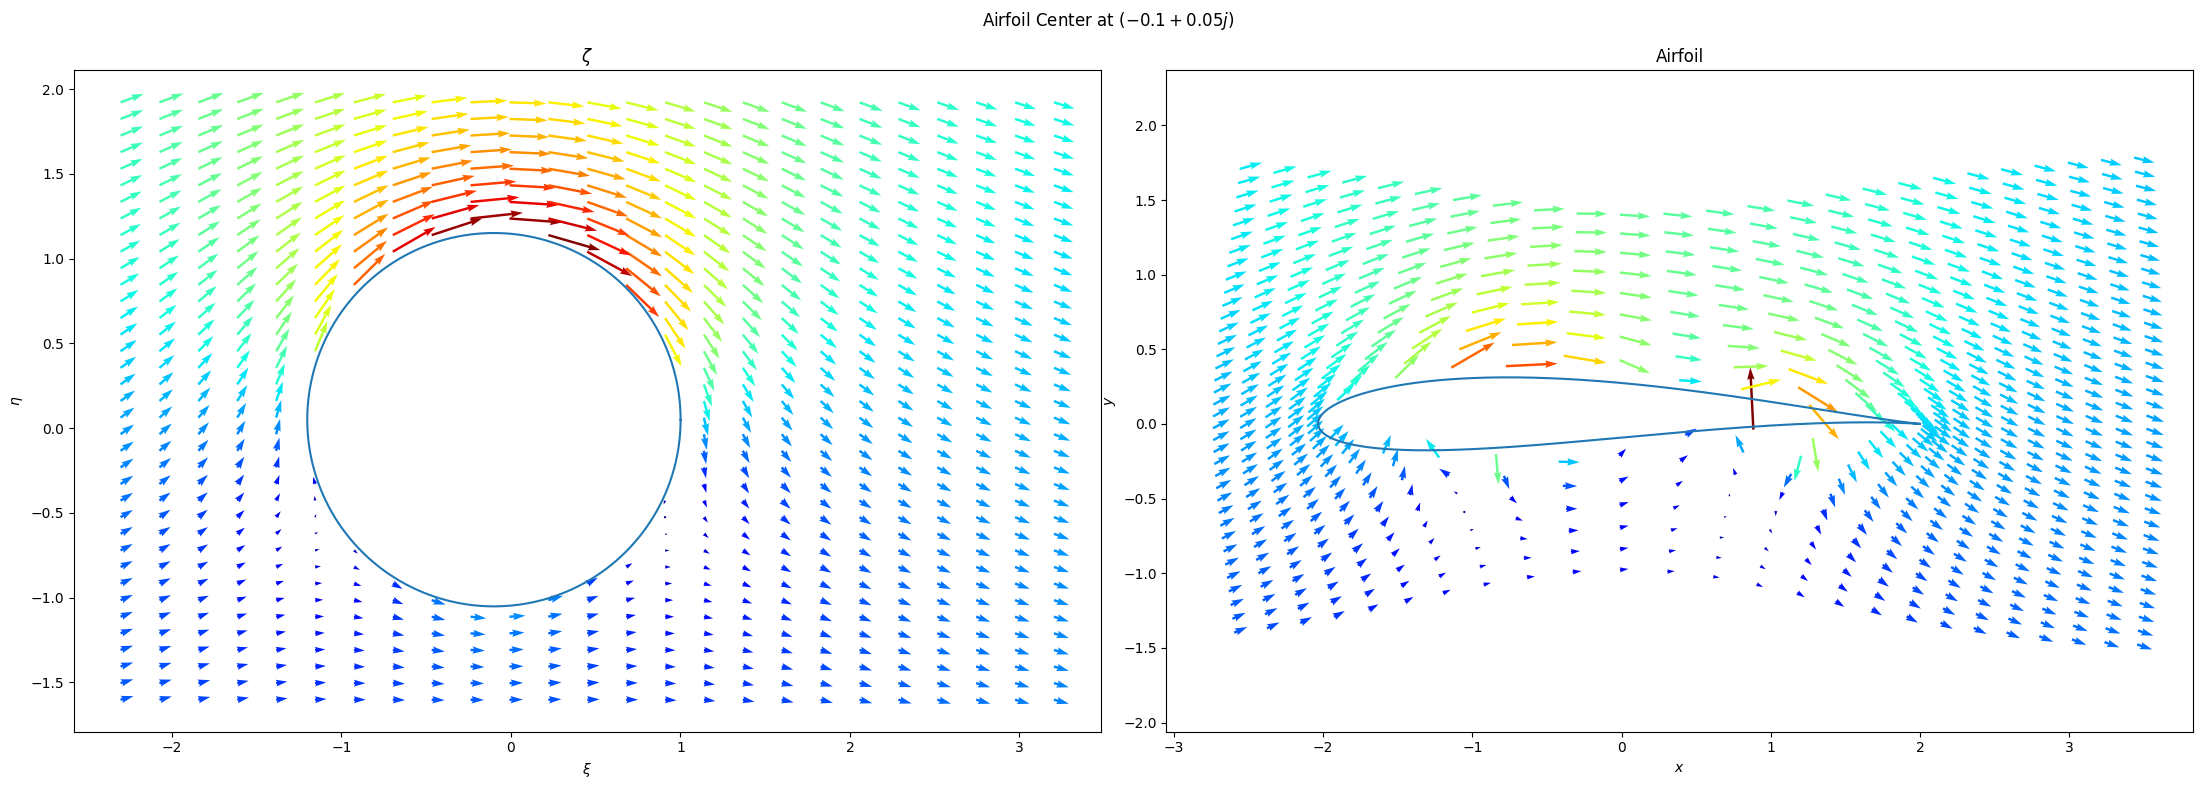

In [13]:
c = np.abs(uPts + 1j*vPts)
c_z = np.abs(uPts_z + 1j*vPts_z)
plt.set_cmap("jet")
plt.figure(figsize=(22, 8))
plt.suptitle("Airfoil Center at $" + str(mu) + "$")

plt.subplot(1, 2, 1)
plt.plot(np.real(AFpts_z), np.imag(AFpts_z))
plt.quiver(X_zfilt, Y_zfilt, uPts_z, vPts_z, c_z-min(c_z))
plt.xlabel("$\\xi$")
plt.ylabel("$\eta$")
plt.title("$\zeta$")
plt.axis("Equal")

plt.subplot(1, 2, 2)
plt.plot(np.real(AFpts), np.imag(AFpts))
plt.quiver(X_filt, Y_filt, uPts, vPts, c-min(c))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Airfoil")
plt.axis("Equal")

plt.tight_layout()